<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

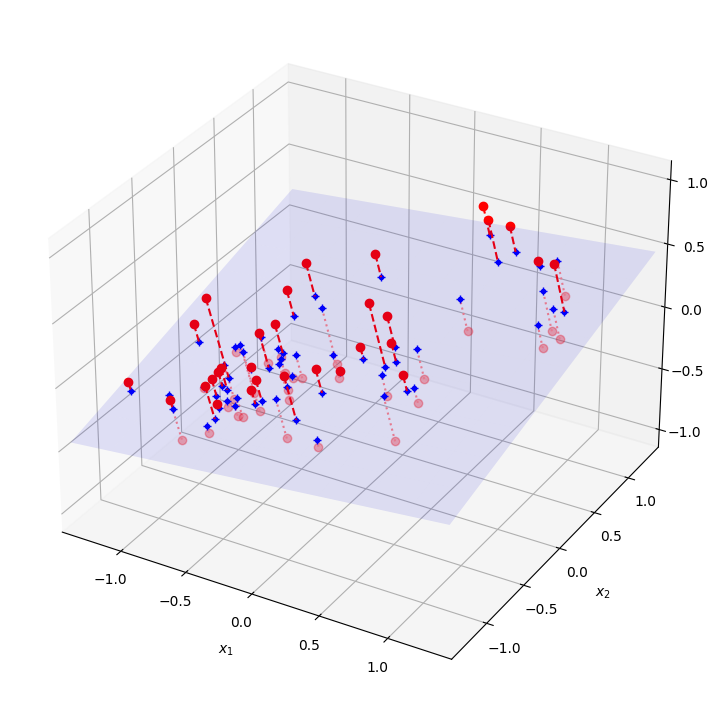

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])


set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

#Explained Variance Ratio

In [ ]:
#her column ne qeder vacibdir
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [ ]:
1-pca.explained_variance_ratio_.sum()

0.09028309326742034

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame = False,parser = "auto")
X_train,y_train = mnist.data[:60000],mnist.target[:60_000]
X_test,y_test = mnist.data[60000:],mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1

In [ ]:
d

154

In [ ]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
X_test_reduced = pca.transform(X_test)

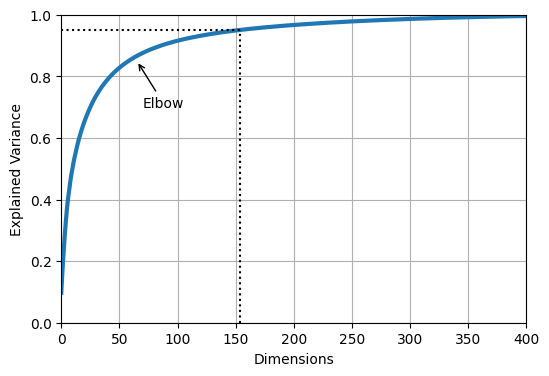

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(cumsum,linewidth = 3)
plt.axis([0,400,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d,d],[0,0.95],"k:")
plt.plot([0,d],[0.95,0.95],"k:")
plt.annotate("Elbow",xy=(65,0.85),xytext=(70,0.7),
             arrowprops = dict(arrowstyle = "->"))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
pipeline = Pipeline([
    ["pca",PCA(random_state=42)],
    ["rnd_clf",RandomForestClassifier(random_state=42)]
])


In [ ]:
params ={
    "pca__n_components" :np.arange(10,80),
    "rnd_clf__n_estimators": np.arange(50,500)
}
random_clf = RandomizedSearchCV(pipeline,params,n_iter = 10,cv = 3,random_state=42)


In [ ]:
random_clf.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[['pca', PCA(random_state=42)],
                                             ['rnd_clf',
                                              RandomForestClassifier(random_state=42)]]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [ ]:
random_clf.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=23, random_state=42)),
                ['rnd_clf',
                 RandomForestClassifier(n_estimators=465, random_state=42)]])

In [ ]:
random_clf.best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=23, random_state=42)),
                ['rnd_clf',
                 RandomForestClassifier(n_estimators=465, random_state=42)]])

In [ ]:
random_clf.best_estimator_.score(X_test,y_test)

0.9532

In [ ]:
random_clf.best_params_

{'rnd_clf__n_estimators': 465, 'pca__n_components': 23}

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
pipelinesgd = pipeline = Pipeline([
    ["pca",PCA(random_state=42)],
    ["sgd",SGDClassifier(random_state=42)]
])

In [ ]:
parametr ={
    "pca__n_components" :[20,30,40,50]

}
grid_clf= GridSearchCV(pipelinesgd,parametr,cv = 3)


In [ ]:
grid_clf.fit(X_train[:1000],y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[['pca', PCA(random_state=42)],
                                       ['sgd',
                                        SGDClassifier(random_state=42)]]),
             param_grid={'pca__n_components': [20, 30, 40, 50]})

In [ ]:
grid_clf.best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=50, random_state=42)),
                ['sgd', SGDClassifier(random_state=42)]])

In [ ]:
grid_clf.best_params_

{'pca__n_components': 50}

In [ ]:
grid_clf.best_estimator_.score(X_test,y_test)

0.8808

#PCA for Compression

In [ ]:
pca = PCA(0.95)
X_reduced=pca.fit_transform(X_train,y_train)

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

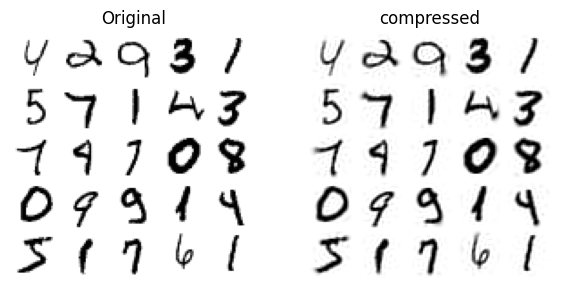

In [ ]:
plt.figure(figsize = (7,4))
for idx,X in enumerate((X_train[::2100],X_recovered[::2100])):
  plt.subplot(1,2,idx+1)
  plt.title(["Original","compressed"][idx])
  for row in range(5):
    for col in range(5):
      plt.imshow(X[row*5 +col].reshape(28,28),cmap = "binary",
                 vmin = 0,vmax = 255,extent = (row,row+1,col,col+1))
      plt.axis([0,5,0,5])
      plt.axis("off")

In [ ]:
rnd_pca = PCA(n_components = 154,svd_solver = "randomized",random_state = 42)
X_reduced = rnd_pca.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)


#LLE

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
X_swiss,t = make_swiss_roll(n_samples = 1000,noise = 0.2,random_state = 42)
lle = LocallyLinearEmbedding(n_components = 2,n_neighbors=10,random_state= 42)
X_unrolled = lle.fit_transform(X_swiss)

In [ ]:

from matplotlib.colors import ListedColormap
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

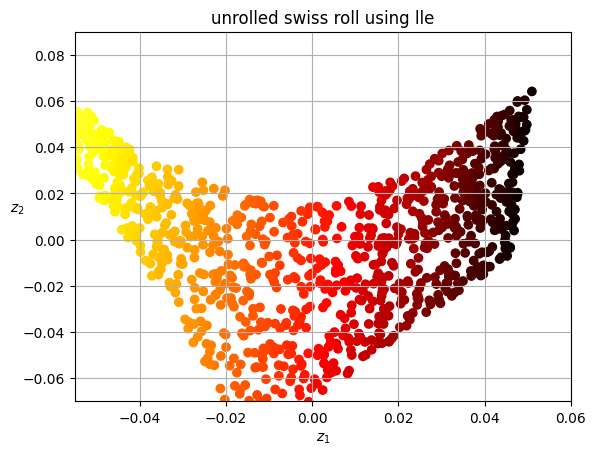

In [ ]:
plt.scatter (X_unrolled[:,0],X_unrolled[:,1],
             c=t, cmap=darker_hot)

plt.xlabel("$z_1$")
plt.ylabel("$z_2$",rotation = 0)
plt.axis([-0.055,0.060,-0.070,0.090])
plt.grid(True)
plt.title("unrolled swiss roll using lle")
plt.show()